# **Hybrid Movie Recommender Sytem with Collaborative and Content Based Filtering (Knowledge and Topic based Hybrid recommendation)**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install sentence_transformers

     |████████████████████████████████| 79 kB 3.4 MB/s 
     |████████████████████████████████| 4.0 MB 34.5 MB/s 
     |████████████████████████████████| 1.2 MB 21.8 MB/s 
     |████████████████████████████████| 77 kB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 48.1 MB/s 
     |████████████████████████████████| 596 kB 35.2 MB/s 
     |████████████████████████████████| 880 kB 39.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=d4343d4e98a5882c2b183ace308a97a1207b26ec80f20d5e40af5980f2f10cc2
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=f4e0d42f397c64b17410fab2e6b33faef42511a0db8aa02a892ae4a8af4f53cf
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sentence-transformers sa

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from keras.layers import Embedding

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
movies_df = pd.read_csv('sample_data/movies.csv',usecols=['movieId','title','genres'],dtype={'movieId': 'int32', 'title': 'str','genres':'str'})
rating_df=pd.read_csv('sample_data/ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
movies_metadf=pd.read_csv('sample_data/movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
movies_df.head(50)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
rating_df.head(50)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [ ]:
movies_metadf.head(50)

,adult,belongs_to_collection,budget,genres,homepage,movieId,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,862,tt0114709,en,Toy Story,...,30-10-1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,8844,tt0113497,en,Jumanji,...,15-12-1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,15602,tt0113228,en,Grumpier Old Men,...,22-12-1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4,31357,tt0114885,en,Waiting to Exhale,...,22-12-1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5,11862,tt0113041,en,Father of the Bride Part II,...,10-02-1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,FALSE,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,6,949,tt0113277,en,Heat,...,15-12-1995,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,FALSE,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,7,11860,tt0114319,en,Sabrina,...,15-12-1995,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,FALSE,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,8,45325,tt0112302,en,Tom and Huck,...,22-12-1995,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,FALSE,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9,9091,tt0114576,en,Sudden Death,...,22-12-1995,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,10,710,tt0113189,en,GoldenEye,...,16-11-1995,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [ ]:
movies_metadf = movies_metadf[['movieId','overview']]
movies_metadf.head()

,movieId,overview
0,1,"Led by Woody, Andy's toys live happily in his ..."
1,2,When siblings Judy and Peter discover an encha...
2,3,A family wedding reignites the ancient feud be...
3,4,"Cheated on, mistreated and stepped on, the wom..."
4,5,Just when George Banks has recovered from his ...


In [ ]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
df = pd.merge(df,movies_metadf,on='movieId')
df.head(50)

,userId,movieId,rating,title,genres,overview
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
5,18,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
6,19,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
7,21,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
8,27,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
9,31,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."


In [ ]:
df = df.dropna()

In [ ]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head(50)

,title,totalRatingCount
0,'Round Midnight (1986),2
1,'Salem's Lot (2004),1
2,'Til There Was You (1997),2
3,"'burbs, The (1989)",17
4,'night Mother (1986),1
5,*batteries not included (1987),7
6,...All the Marbles (1981),1
7,...And Justice for All (1979),3
8,1-900 (06) (1994),1
9,10 (1979),4


In [ ]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head(50)

,userId,movieId,rating,title,genres,overview,totalRatingCount
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
5,18,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
6,19,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
7,21,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
8,27,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
9,31,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215


In [ ]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,genres,overview,totalRatingCount
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215


In [ ]:
rating_popular_movie.shape

(37448, 7)

In [ ]:
print("Input the genre you want to watch")
input1=input()

print("-------------------------------------------")

print("Input the rating threshold")

input2=float(input())

Input the genre you want to watch
Comedy
-------------------------------------------
Input the rating threshold
2


In [ ]:
filter_table = rating_popular_movie.loc[(rating_popular_movie['genres'] .str.contains(input1)) & (rating_popular_movie['rating'] >= input2)]
filter_table

,userId,movieId,rating,title,genres,overview,totalRatingCount
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",215
...,...,...,...,...,...,...,...
65587,590,3552,4.0,Caddyshack (1980),Comedy,Benji has become stranded on a remote island a...,52
65588,599,3552,3.0,Caddyshack (1980),Comedy,Benji has become stranded on a remote island a...,52
65589,603,3552,2.0,Caddyshack (1980),Comedy,Benji has become stranded on a remote island a...,52
65590,608,3552,3.0,Caddyshack (1980),Comedy,Benji has become stranded on a remote island a...,52


In [ ]:
#pivot matrix
movie_features_df=filter_table.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,4,5,6,7,8,9,10,11,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
"40-Year-Old Virgin, The (2005)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
Ace Ventura: Pet Detective (1994),0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,3.5,0.0,3.0
Ace Ventura: When Nature Calls (1995),0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
Addams Family Values (1993),0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,4.0,0.0,0.0,0.0,2.5,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors

model_hybrid = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_hybrid.fit(movie_features_df_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
movie_features_df.shape

(167, 592)

In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_hybrid.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

120


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Raising Arizona (1987):

1: Breakfast Club, The (1985), with distance of 0.47916656732559204:
2: Fish Called Wanda, A (1988), with distance of 0.4858436584472656:
3: Ferris Bueller's Day Off (1986), with distance of 0.4913124442100525:
4: Groundhog Day (1993), with distance of 0.4925950765609741:
5: Young Frankenstein (1974), with distance of 0.49535346031188965:


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
data = df[['genres', 'overview', 'title']]
data = data.drop_duplicates()
data.columns = ['Genre','Overview','Series_Title']
data = data.reset_index(drop = True)

In [ ]:
data = data.head(1000)

In [ ]:
data.head()

,Genre,Overview,Series_Title
0,Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",Toy Story (1995)
1,Comedy|Romance,A family wedding reignites the ancient feud be...,Grumpier Old Men (1995)
2,Action|Crime|Thriller,"Obsessive master thief, Neil McCauley leads a ...",Heat (1995)
3,Mystery|Thriller,Two homicide detectives are on a desperate hun...,Seven (a.k.a. Se7en) (1995)
4,Crime|Mystery|Thriller,"Held in an L.A. interrogation room, Verbal Kin...","Usual Suspects, The (1995)"


In [ ]:
text_data = data['Overview']
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
X = np.array(embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,1.689701,2.718340,-2.750793,-0.720839,-0.836532
1,1.793798,-2.696469,-2.280864,-0.462313,-1.420479
2,-4.378762,-2.414505,-1.255512,-1.240247,2.901980
3,-3.517155,-3.781054,1.031150,-0.552702,0.211293
4,-5.456641,-0.514072,-0.419309,-0.034595,0.919436


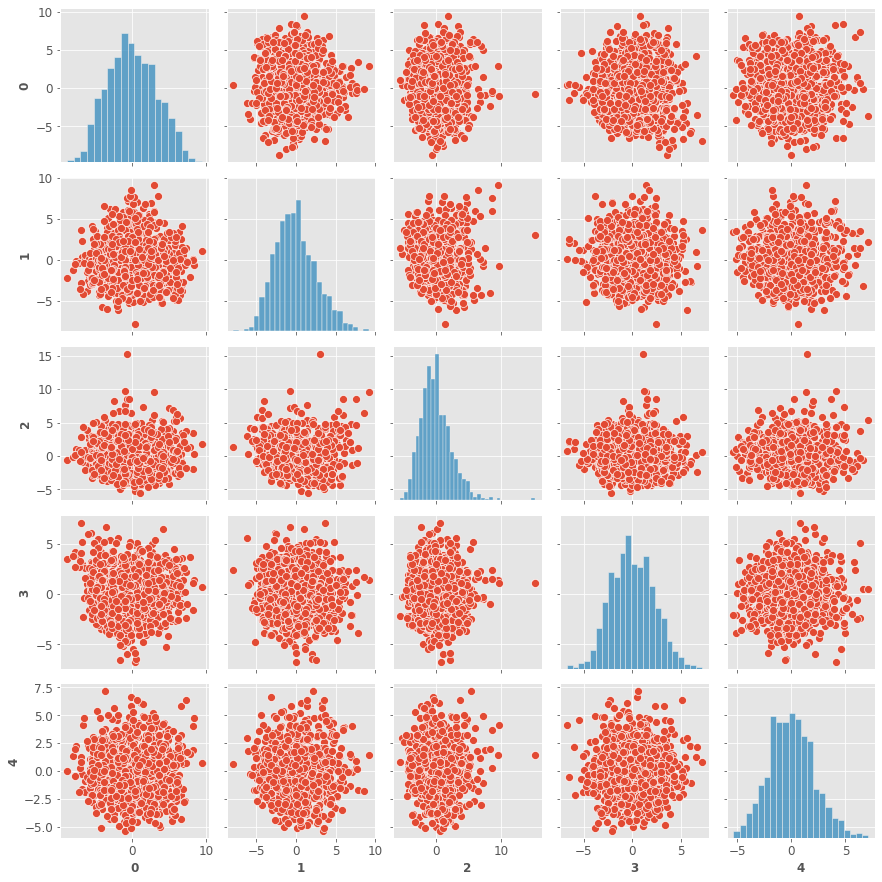

In [ ]:
sns.pairplot(pca_data)

In [ ]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm = cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Series_Title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The genre of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

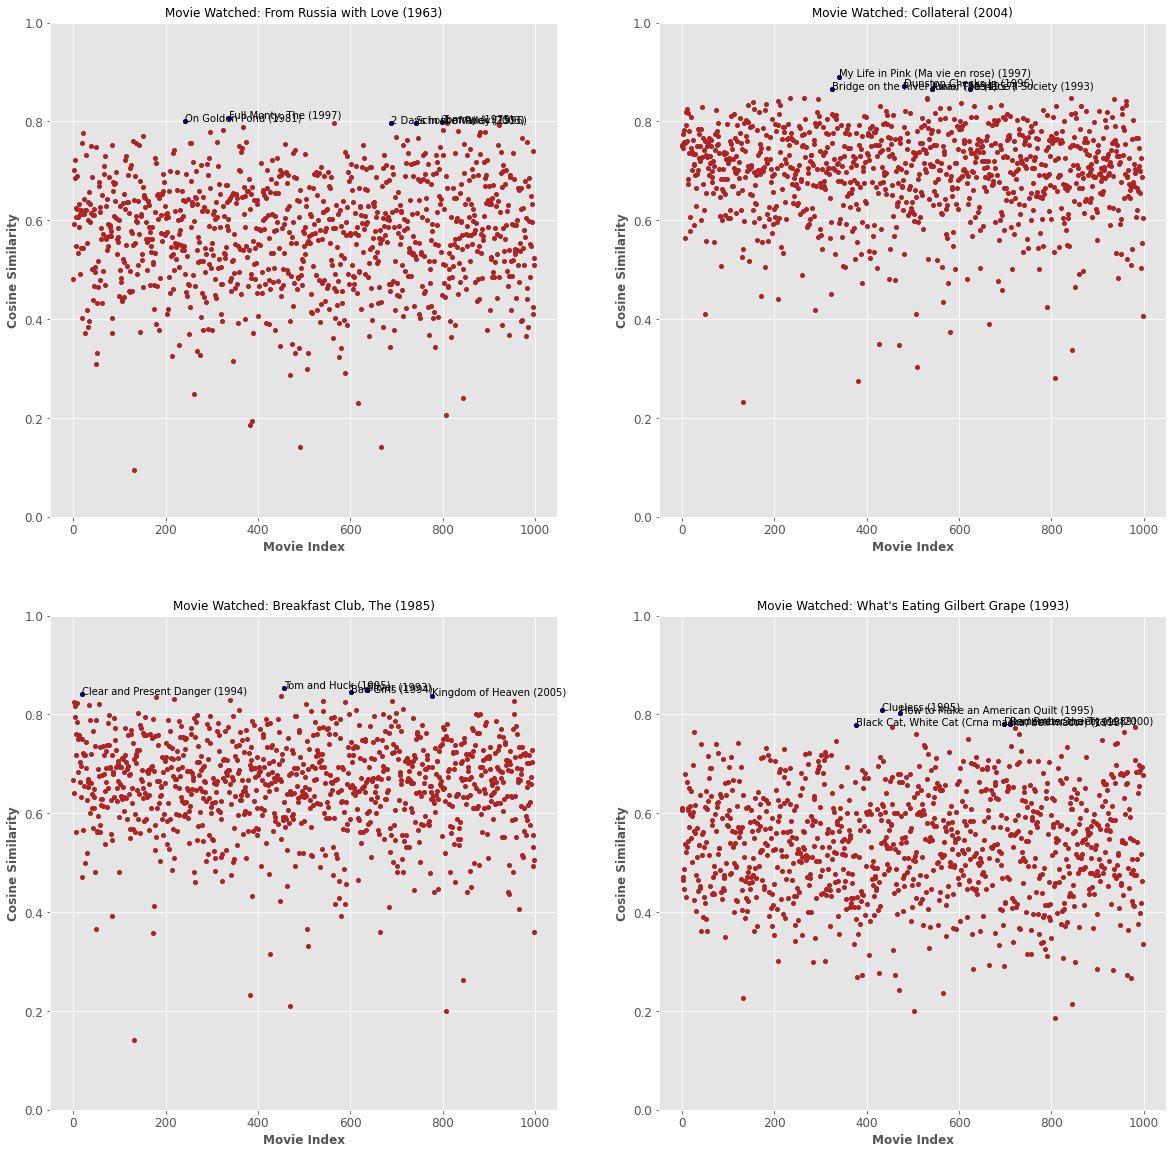

In [ ]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Series_Title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [ ]:
give_recommendations(2,True)

The watched movie is this one: Heat (1995) 

The number 1 recommended movie is this one: Galaxy Quest (1999) 

The number 1 recommended movie is this one: Big (1988) 

The number 1 recommended movie is this one: Seven (a.k.a. Se7en) (1995) 

The number 1 recommended movie is this one: Hunt for Red October, The (1990) 

The number 1 recommended movie is this one: In the Name of the Father (1993) 



{'Index': [387, 180, 3, 699, 290],
 'Movies': array(['Galaxy Quest (1999)', 'Big (1988)', 'Seven (a.k.a. Se7en) (1995)',
        'Hunt for Red October, The (1990)',
        'In the Name of the Father (1993)'], dtype=object)}

In [ ]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 Obsessive master thief, Neil McCauley leads a top-notch crew on various insane heists throughout Los Angeles while a mentally unstable detective, Vincent Hanna pursues him without rest. Each man recognizes and respects the ability and the dedication of the other even though they are aware their cat-and-mouse game may end in violence. 

The plot of the number 1 recommended movie is this one:
 Police Lt. Leonard Diamond vies to bring a clever, well connected, and sadistic gangster to justice all the while obsessing over the gangsters' girlfriend. 

The plot of the number 2 recommended movie is this one:
 The Limey follows Wilson (Terence Stamp), a tough English ex-con who travels to Los Angeles to avenge his daughter's death. Upon arrival, Wilson goes to task battling Valentine (Peter Fonda) and an army of L.A.'s toughest criminals, hoping to find clues and piece together what happened. After surviving a near-death beating, getting thrown from 

{'Index': [387, 180, 3, 699, 290],
 'Movies': array(['Galaxy Quest (1999)', 'Big (1988)', 'Seven (a.k.a. Se7en) (1995)',
        'Hunt for Red October, The (1990)',
        'In the Name of the Father (1993)'], dtype=object)}

In [ ]:
give_recommendations(65,True,True,True)

The watched movie is this one: Abyss, The (1989) 

The number 1 recommended movie is this one: Any Given Sunday (1999) 

The number 1 recommended movie is this one: Eye for an Eye (1996) 

The number 1 recommended movie is this one: Circle, The (Dayereh) (2000) 

The number 1 recommended movie is this one: General, The (1926) 

The number 1 recommended movie is this one: Crying Game, The (1992) 

The plot of the watched movie is this one:
 This film was inspired by a real event—a young US Marine, recently back from the Gulf War, was found digging a grave for his murdered wife in the middle of the California Mojave. 

The plot of the number 1 recommended movie is this one:
 Arne buys a house in suburban Los Angeles, only to discover that the previous owner died in a grisly manner. Then he gets a visit from the dead woman's best friend, who is convinced that she didn't commit suicide. Together, they investigate what Tilly is sure must be a murder, and come up against the toughest moral d

{'Index': [800, 475, 419, 960, 317],
 'Movies': array(['Any Given Sunday (1999)', 'Eye for an Eye (1996)',
        'Circle, The (Dayereh) (2000)', 'General, The (1926)',
        'Crying Game, The (1992)'], dtype=object)}

In [ ]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [ ]:
recomm_data.sample(frac=1).head(20)

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
550,Man of the House (1995),L.A. Confidential (1997),"Maltese Falcon, The (1941)",Twelfth Night (1996),How to Make an American Quilt (1995),Notorious (1946)
79,"Quiet Man, The (1952)","Devil's Backbone, The (Espinazo del diablo, El...",Batman Forever (1995),Basic Instinct (1992),Goodfellas (1990),Sleepless in Seattle (1993)
356,"Jerk, The (1979)",All Dogs Go to Heaven 2 (1996),I.Q. (1994),Dial M for Murder (1954),Dirty Dancing (1987),What Lies Beneath (2000)
252,Requiem for a Dream (2000),"'burbs, The (1989)",White Man's Burden (1995),Amadeus (1984),Being John Malkovich (1999),"Rock, The (1996)"
215,Hook (1991),L.I.E. (2001),Dogma (1999),Annie Hall (1977),Bad Girls (1994),Three Wishes (1995)
814,Adaptation (2002),"Great Mouse Detective, The (1986)",First Kid (1996),Starship Troopers (1997),Bottle Rocket (1996),Teenage Mutant Ninja Turtles II: The Secret of...
607,Cops and Robbersons (1994),Kingdom of Heaven (2005),Cobb (1994),Henry V (1989),Dick Tracy (1990),X-Men (2000)
787,Home Alone (1990),Rob Roy (1995),"Walk to Remember, A (2002)",Galaxy Quest (1999),Bad Girls (1994),In the Name of the Father (1993)
570,Tank Girl (1995),Notorious (1946),"Hunted, The (1995)","Hunchback of Notre Dame, The (1996)",Demolition Man (1993),How to Make an American Quilt (1995)
345,"Perfect Murder, A (1998)",Chasing Liberty (2004),Flipper (1996),Sleepless in Seattle (1993),Clerks (1994),Scream 3 (2000)
